Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

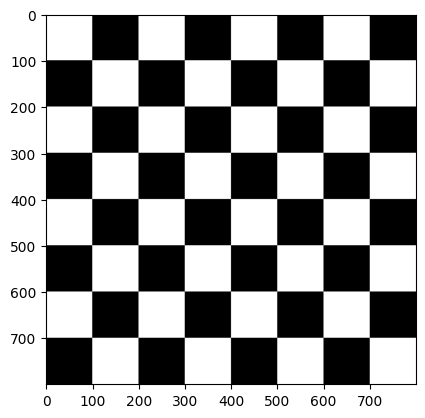

In [66]:
square = 800
img_chess=  np.zeros((square, square, 1), dtype= np.uint8)

step = 100

for row in range(square):
    for column in range(square):
        if (row+column) % 2 == 0:
            start_row = row*step
            start_column = column*step
            end_row = (row+1)*step
            end_column = (column+1)*step
            img_chess[start_row:end_row,start_column:end_column,0] = 255
plt.imshow(img_chess, cmap='gray')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

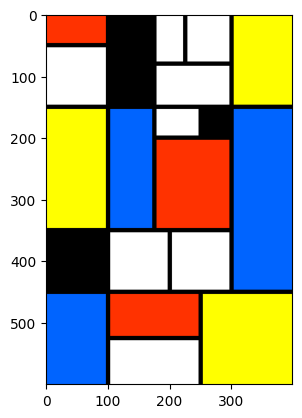

In [67]:
height = 600
width = 400

mondrian_img = np.zeros((height, width, 3), dtype=np.uint8)

mondrian_img[:,:,:] = 255
cv2.line(mondrian_img, (100, 0), (100, height), (0,0,0), 5)
cv2.line(mondrian_img, (300, 0), (300, 450), (0,0,0), 5)
cv2.line(mondrian_img, (175, 0), (175, 350), (0,0,0), 5)
cv2.line(mondrian_img, (0, 350), (300,350), (0,0,0), 5)
cv2.line(mondrian_img, (0, 50), (100,50), (0,0,0), 5)
cv2.line(mondrian_img, (175,200), (300,200), (0,0,0), 5)
cv2.line(mondrian_img, (0,150), (400,150), (0,0,0), 5)
cv2.line(mondrian_img, (0,450), (400,450), (0,0,0), 5)
cv2.line(mondrian_img, (250, 450), (250, 600), (0,0,0), 5)
cv2.line(mondrian_img, (100,525), (250,525), (0,0,0), 5)
cv2.line(mondrian_img, (250,150), (250, 200), (0,0,0), 5)
cv2.line(mondrian_img, (150, 80), (300, 80), (0,0,0), 5)
cv2.line(mondrian_img, (225,0), (225, 80), (0,0,0), 5)
cv2.line(mondrian_img, (200, 350), (200,450), (0,0,0), 5)

cv2.rectangle(mondrian_img, (0,0), (96,46), (255,50,0), -1)
cv2.rectangle(mondrian_img, (304,0), (400,146), (255,255,0), -1)
cv2.rectangle(mondrian_img, (104,154), (171,346), (0,100,255), -1)
cv2.rectangle(mondrian_img, (0,346), (96, 446), (0,0,0), -1)
cv2.rectangle(mondrian_img, (0,154), (96,346), (255,255,0), -1)
cv2.rectangle(mondrian_img, (179,204), (296,346), (255,50,0), -1)
cv2.rectangle(mondrian_img, (104,0), (171, 146), (0,0,0), -1)
cv2.rectangle(mondrian_img, (304, 154), (400, 446), (0,100, 255), -1)
cv2.rectangle(mondrian_img, (104, 454), (246, 521), (255,50,0), -1)
cv2.rectangle(mondrian_img, (254, 454), (400, 600), (255,255,0), -1)
cv2.rectangle(mondrian_img, (0, 454), (96, 600), (0,100,255), -1)
cv2.rectangle(mondrian_img, (254, 154), (296, 196), (0,0,0), -1)

plt.imshow(mondrian_img)
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [68]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        r[50:200, 100:500] = 1

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

In [69]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    # Convert to grayscale to measure brightness
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Find te darkest and brightest pixel in the image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

    # Draw circles on the darkest and brightest pixel locations
    cv2.circle(frame, min_loc, 10, (0,0,255, 2))
    cv2.circle(frame, max_loc, 10, (0,255,0, 2))

    cv2.imshow('Cam', frame)

    if cv2.waitKey(20) == 27:
        break
  
vid.release()
cv2.destroyAllWindows()


¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [70]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    # Convert to grayscale to measure brightness

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply a mean filter with a block of 8x8
    mean = cv2.blur(gray, (8,8))

    # Find te darkest and brightest block of 8x8 in the image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(mean)

    # Draw rectangles (8x8) around the darkest and brightest regions
    cv2.rectangle(frame, min_loc, (min_loc[0]+8, min_loc[1]+8), (0,0,255), 2)
    cv2.rectangle(frame, max_loc, (max_loc[0]+8, max_loc[1]+8), (0,255,0), 2)

    cv2.imshow('Cam', frame)

    if cv2.waitKey(20) == 27:
        break
  
vid.release()
cv2.destroyAllWindows()


TAREA: Llevar a cabo una propuesta propia de pop art

In [71]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

image = cv2.imread("Albert_Einstein_sticks_his_tongue.jpg")
image = cv2.resize(image, (w,h))


while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos con los valores de los planos
        tl[:,:,0] = gray
        tl[:,:,1] = gray
        tl[:,:,2] = gray

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g -r 
        tr[:,:,2] = 255 -r
        
        bl[:,:,0] = 255 - g
        bl[:,:,1] = 255 - b 
        bl[:,:,2] = r

        br[:,:,:] = image
    
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()